In [1]:
from ats import logger
logger.setup('INFO')

# Anomaly detection on banking data

This example make use of an anomaly detector basend on Isolation Forest and SOM (Self-Organizing Maps) to detect anomalies at series-level on a data set of bank account balances.

## 1) Load the data

This will load sample account balances in "wide" format

In [2]:
from ats.utils import load_isp_format_wide_df
wide_df = load_isp_format_wide_df('ats/tests/test_data/ISP_TS_2021-23_minisample_test.csv')

In [3]:
wide_df

,2021-01-01 00:00:00+00:00,2021-01-02 00:00:00+00:00,2021-01-03 00:00:00+00:00,2021-01-04 00:00:00+00:00,2021-01-05 00:00:00+00:00,2021-01-06 00:00:00+00:00,2021-01-07 00:00:00+00:00,2021-01-08 00:00:00+00:00,2021-01-09 00:00:00+00:00,2021-01-10 00:00:00+00:00,...,2023-12-22 00:00:00+00:00,2023-12-23 00:00:00+00:00,2023-12-24 00:00:00+00:00,2023-12-25 00:00:00+00:00,2023-12-26 00:00:00+00:00,2023-12-27 00:00:00+00:00,2023-12-28 00:00:00+00:00,2023-12-29 00:00:00+00:00,2023-12-30 00:00:00+00:00,2023-12-31 00:00:00+00:00
1311700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
508010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
602264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
365405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2253513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2540012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1583390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1564436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now convert "wide" format to a lits of standard timeseries format dataframes, with one series per client id.

In [4]:
from ats.utils import wide_df_to_list_of_timeseries_df
list_of_timeseries_df = wide_df_to_list_of_timeseries_df(wide_df)

In [5]:
list_of_timeseries_df[0]

,1311700
timestamp,
2021-01-01 00:00:00+00:00,0.0
2021-01-02 00:00:00+00:00,0.0
2021-01-03 00:00:00+00:00,0.0
2021-01-04 00:00:00+00:00,0.0
2021-01-05 00:00:00+00:00,0.0
...,...
2023-12-27 00:00:00+00:00,0.0
2023-12-28 00:00:00+00:00,0.0
2023-12-29 00:00:00+00:00,0.0


## 2) Instantiate and fit the anomaly detector

Default parameters are used (see docstings)

In [6]:
from ats.anomaly_detectors.ml.ifsom import IFSOMAnomalyDetector
anomaly_detector = IFSOMAnomalyDetector()
anomaly_detector.fit(list_of_timeseries_df)

[INFO] ats.anomaly_detectors.ml.ifsom: Computing FATS features...
[INFO] ats.anomaly_detectors.ml.ifsom: Processing for label: 1311700
[INFO] ats.anomaly_detectors.ml.ifsom: Processing for label: 374107
[INFO] ats.anomaly_detectors.ml.ifsom: Processing for label: 508010
[INFO] ats.anomaly_detectors.ml.ifsom: Processing for label: 602264
[INFO] ats.anomaly_detectors.ml.ifsom: Processing for label: 365405
[INFO] ats.anomaly_detectors.ml.ifsom: Processing for label: 2253513
[INFO] ats.anomaly_detectors.ml.ifsom: Processing for label: 2540012
[INFO] ats.anomaly_detectors.ml.ifsom: Processing for label: 1435867
[INFO] ats.anomaly_detectors.ml.ifsom: Processing for label: 1583390
[INFO] ats.anomaly_detectors.ml.ifsom: Processing for label: 1564436
[INFO] ats.anomaly_detectors.ml.ifsom: Processing for label: 554977
[INFO] ats.anomaly_detectors.ml.ifsom: Processing for label: 2616769
[INFO] ats.anomaly_detectors.ml.ifsom: Processing for label: 83534
[INFO] ats.anomaly_detectors.ml.ifsom: Proce

Inspect the anomaly detector after fit. Add `path='./plots/'` or similar to store the plots to files.

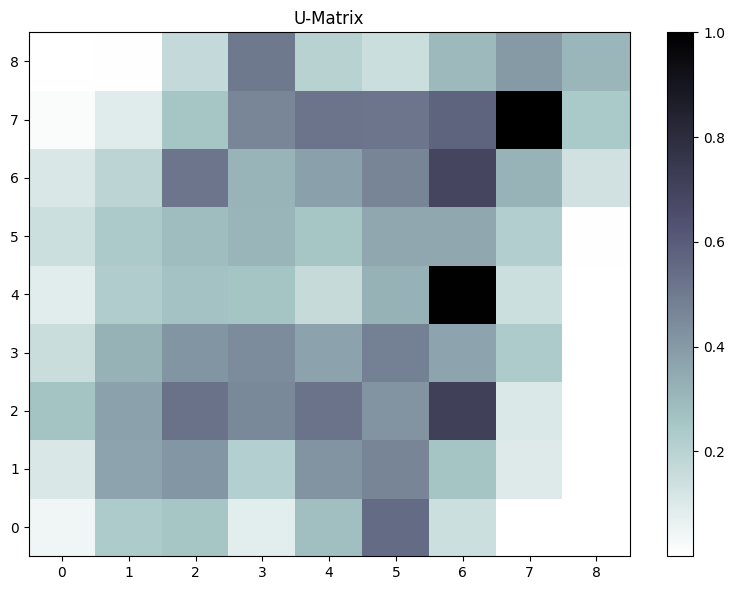

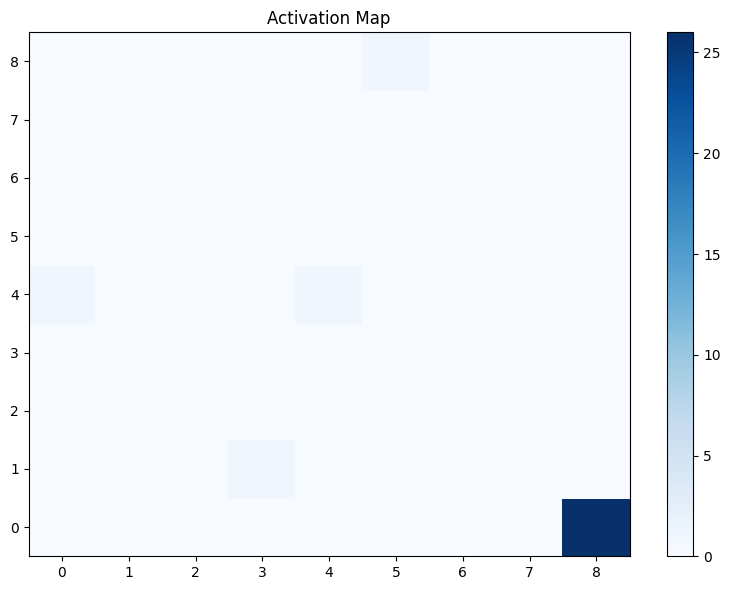

In [7]:
anomaly_detector.inspect()

## 3) Apply the anomaly detector

Again on the same fit data, to find out anomalies in "unsupervised" mode

In [8]:
results_list_of_timeseries_df = anomaly_detector.apply(list_of_timeseries_df)

[INFO] ats.anomaly_detectors.ml.ifsom: Loaded cached FATS features
[INFO] ats.anomaly_detectors.ml.ifsom: Cleaning data
[INFO] ats.anomaly_detectors.ml.ifsom: Loading IF...
[INFO] ats.anomaly_detectors.ml.ifsom: Done
[INFO] ats.anomaly_detectors.ml.ifsom: Scaling dataset for training SOM
[INFO] ats.anomaly_detectors.ml.ifsom: Loading SOM...
[INFO] ats.anomaly_detectors.ml.ifsom: Done
[INFO] ats.anomaly_detectors.ml.ifsom: Finding winners
[INFO] ats.anomaly_detectors.ml.ifsom: Done


## 3) Inspect results

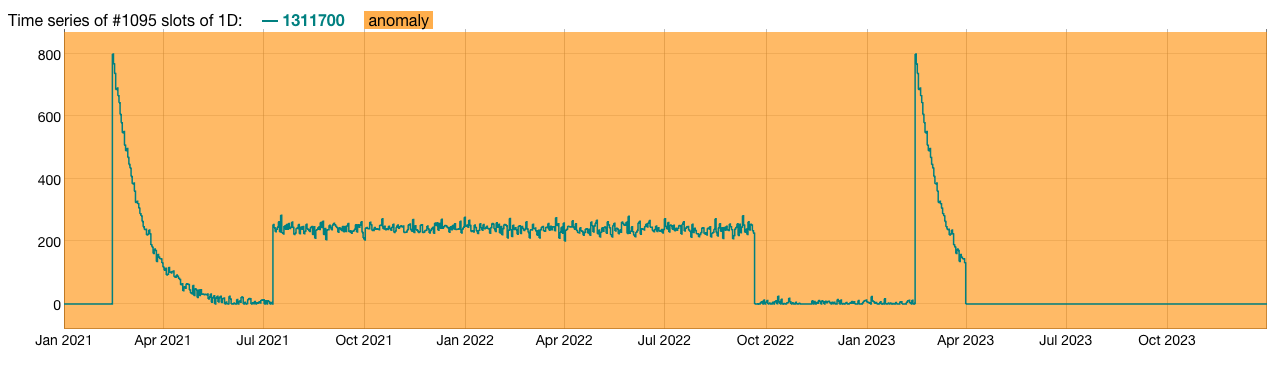

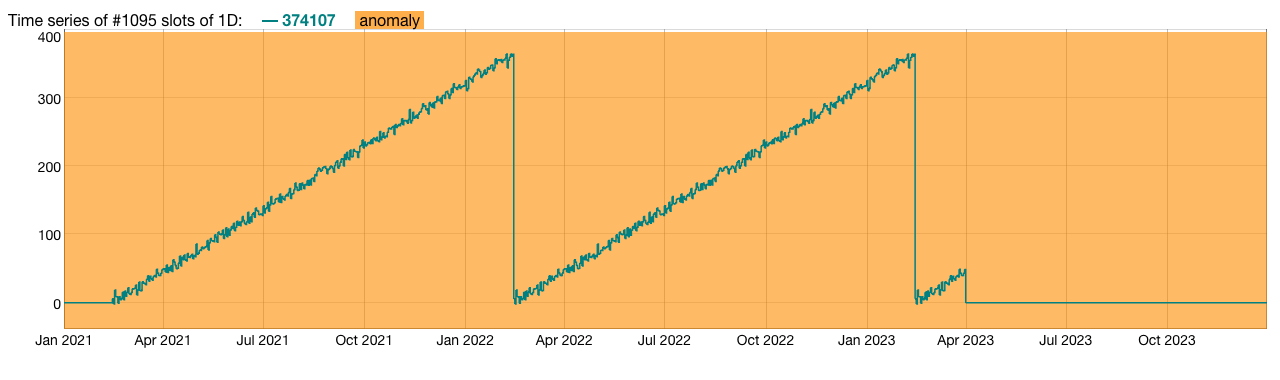

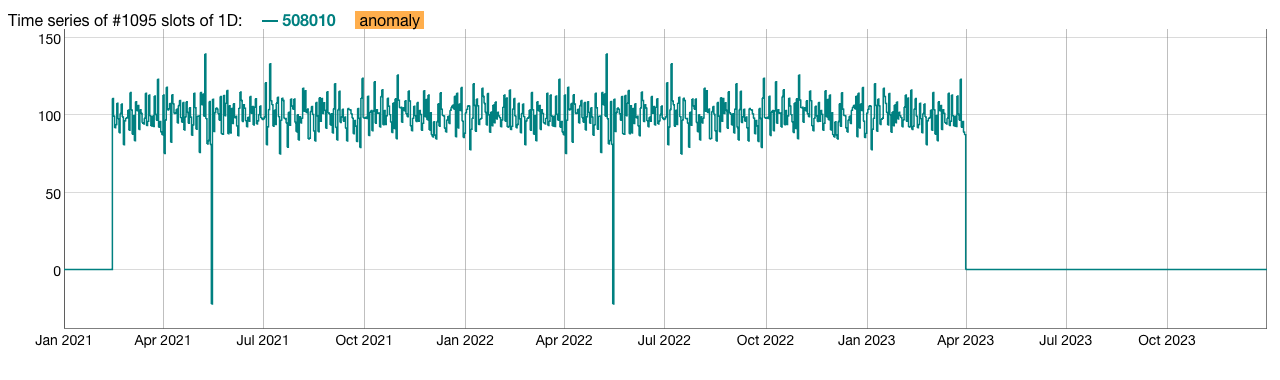

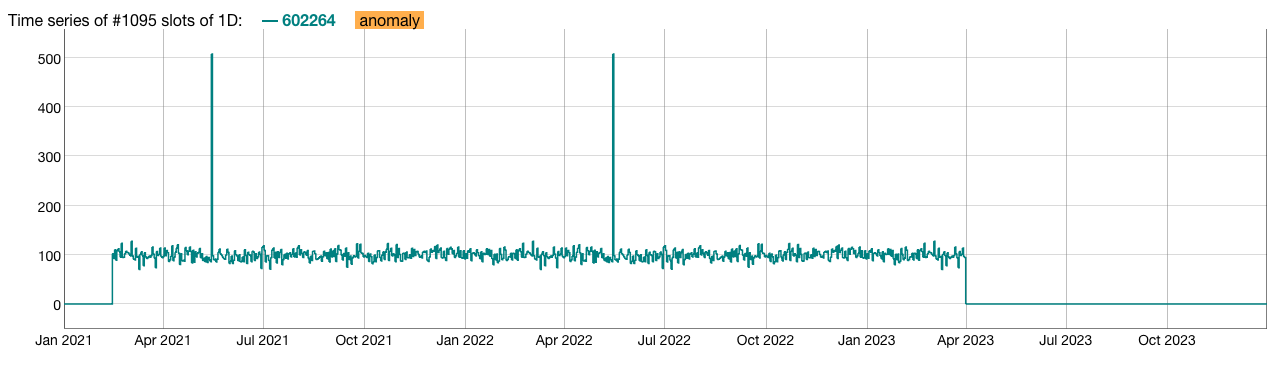

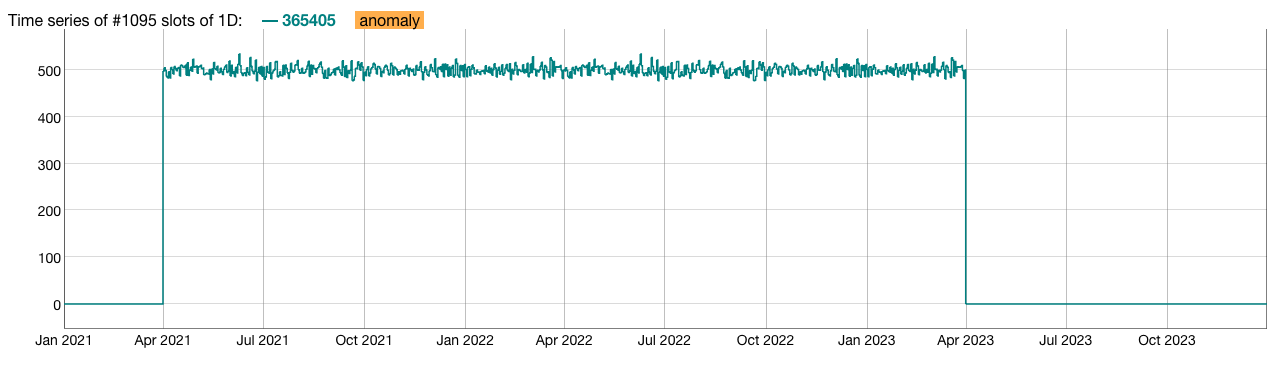

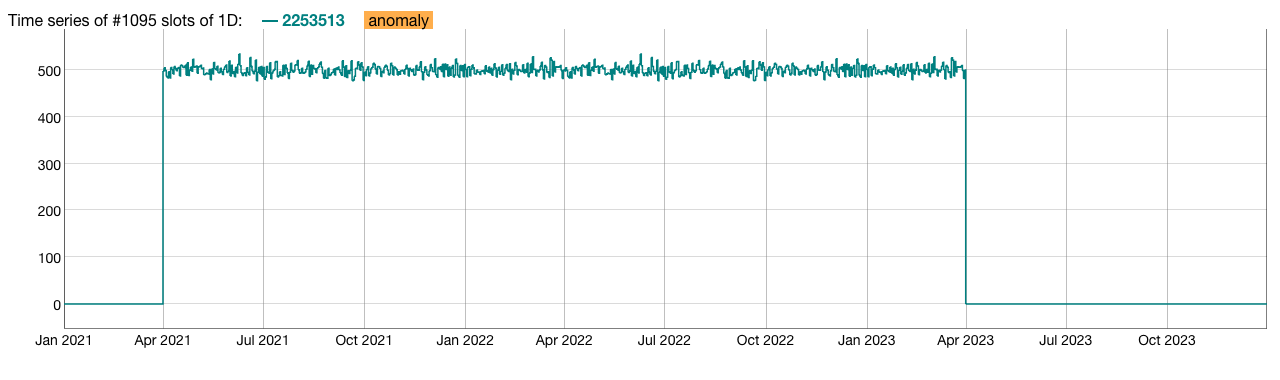

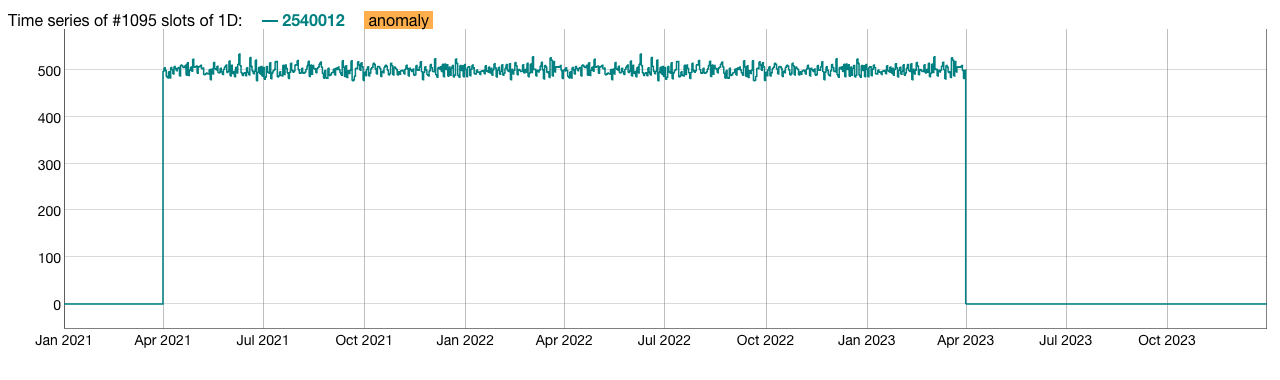

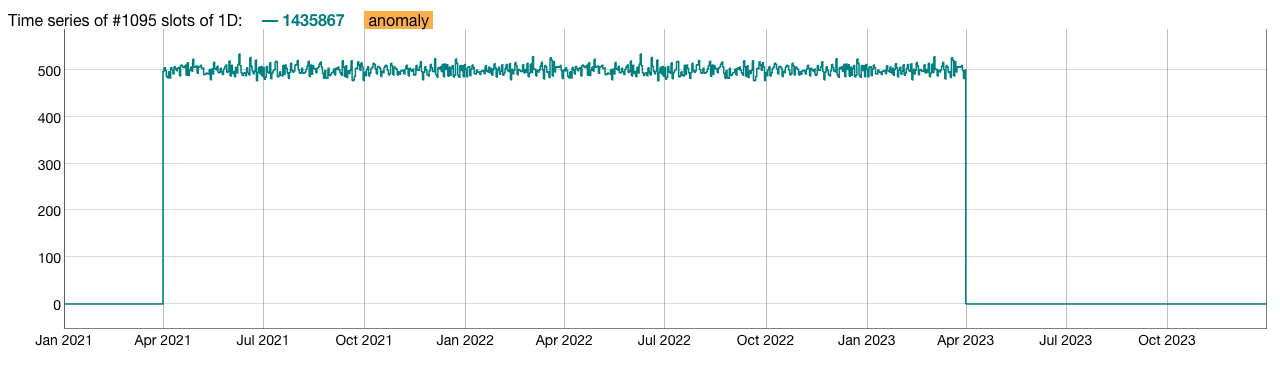

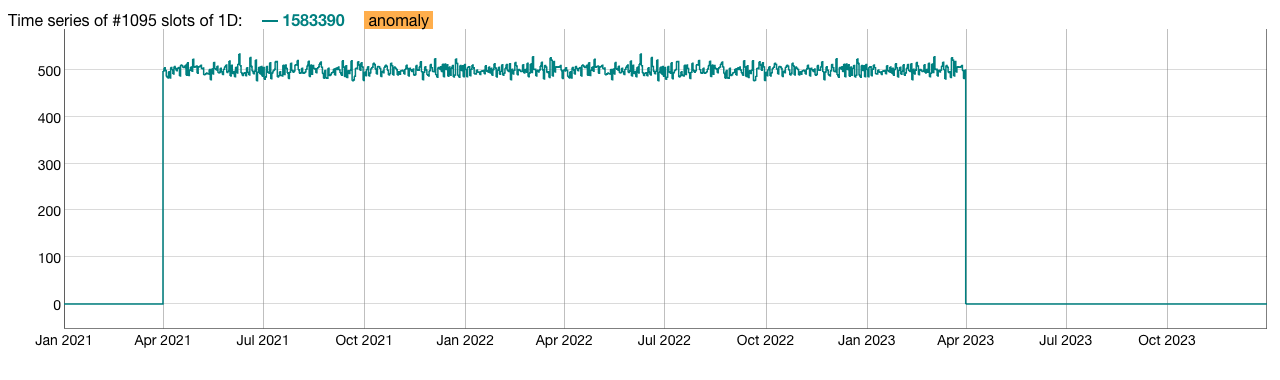

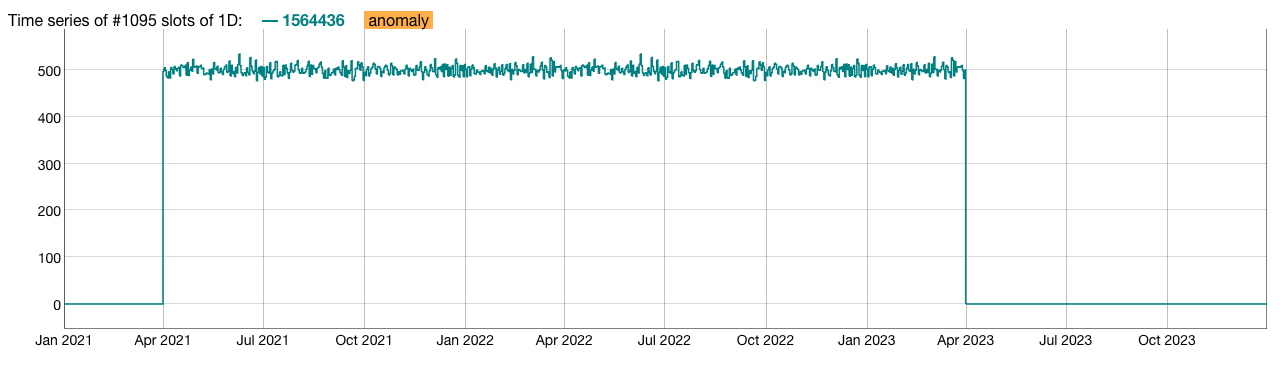

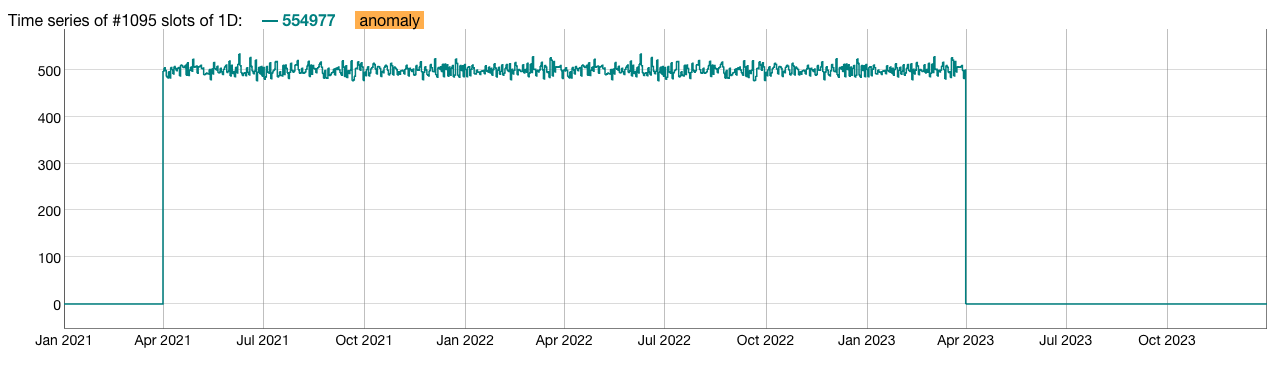

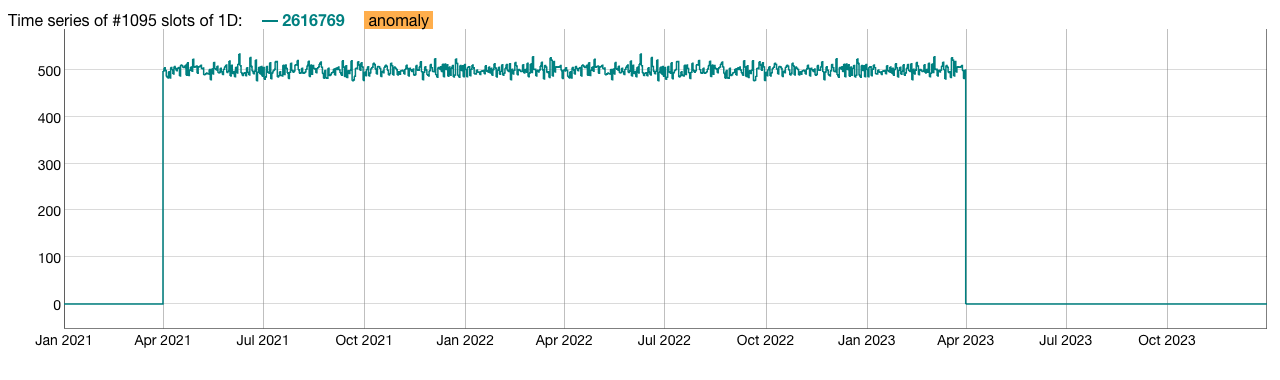

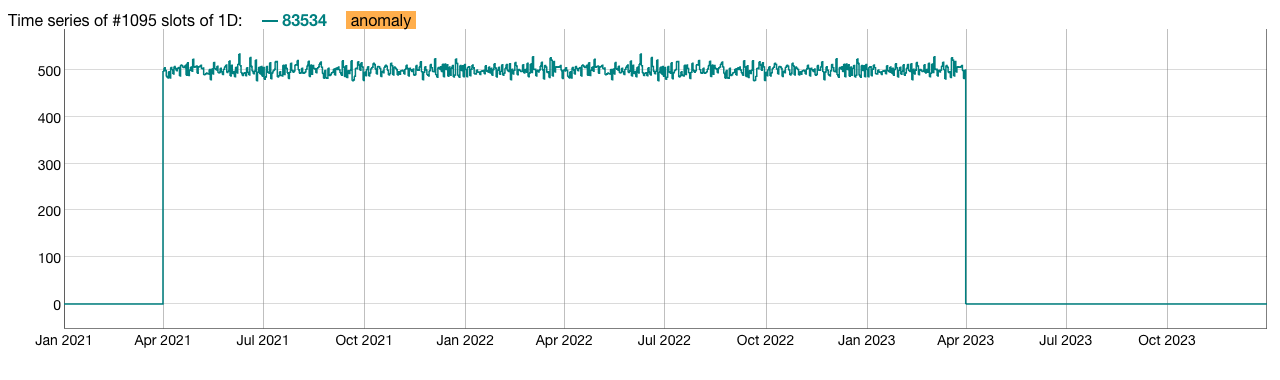

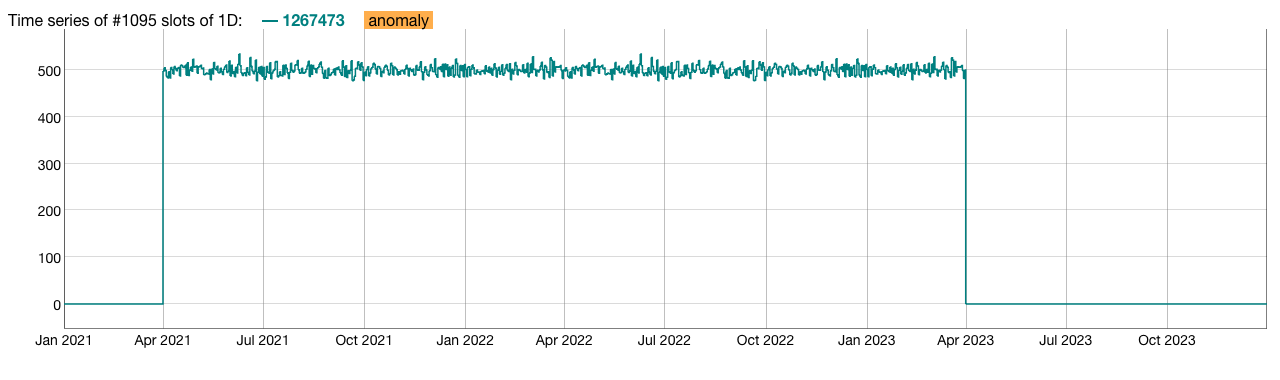

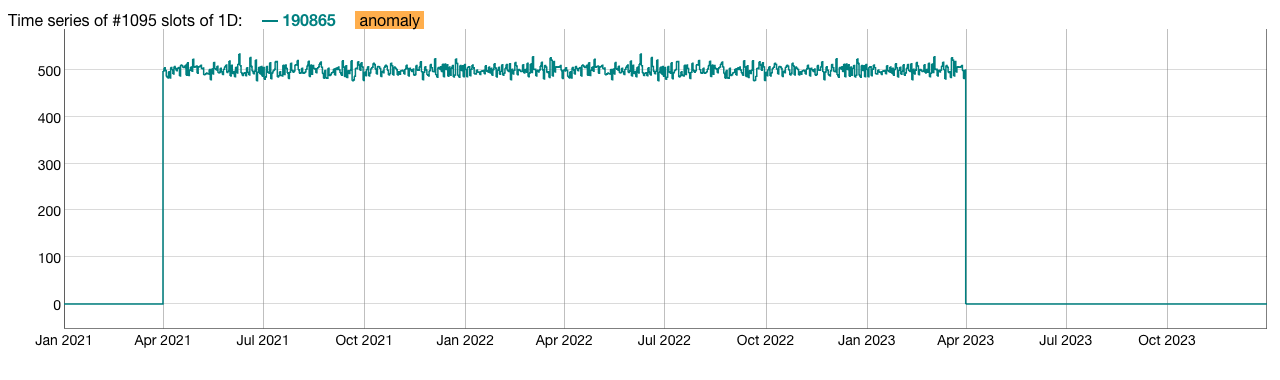

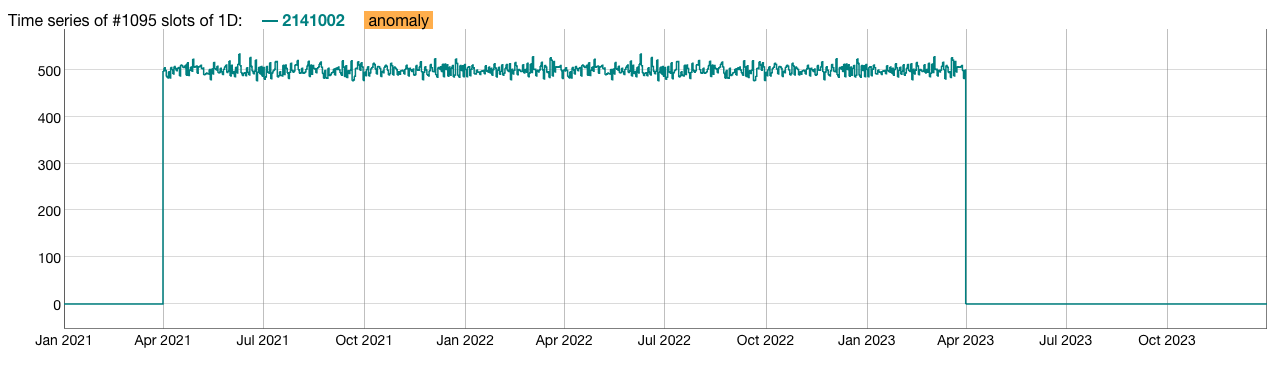

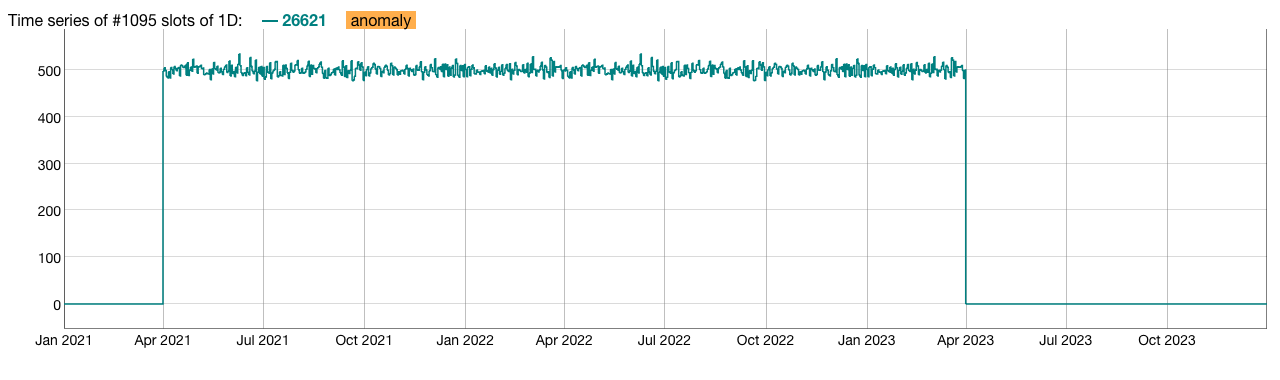

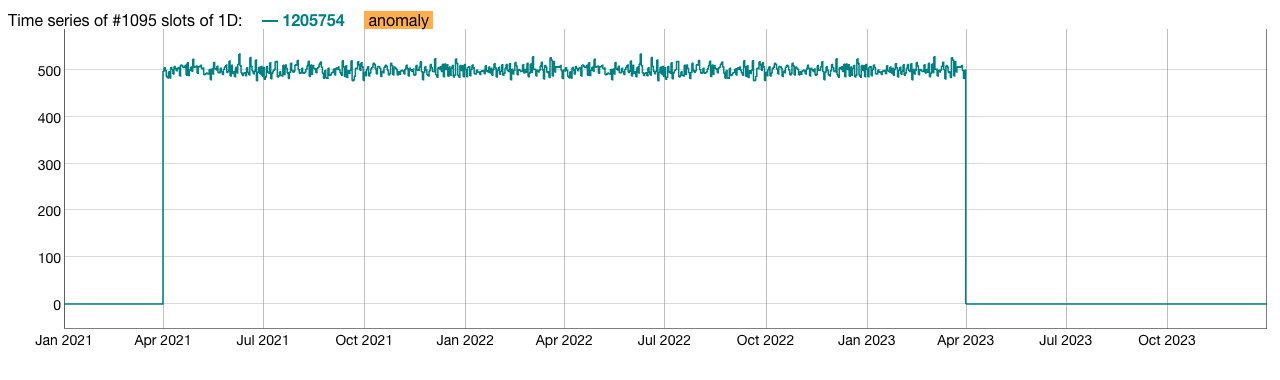

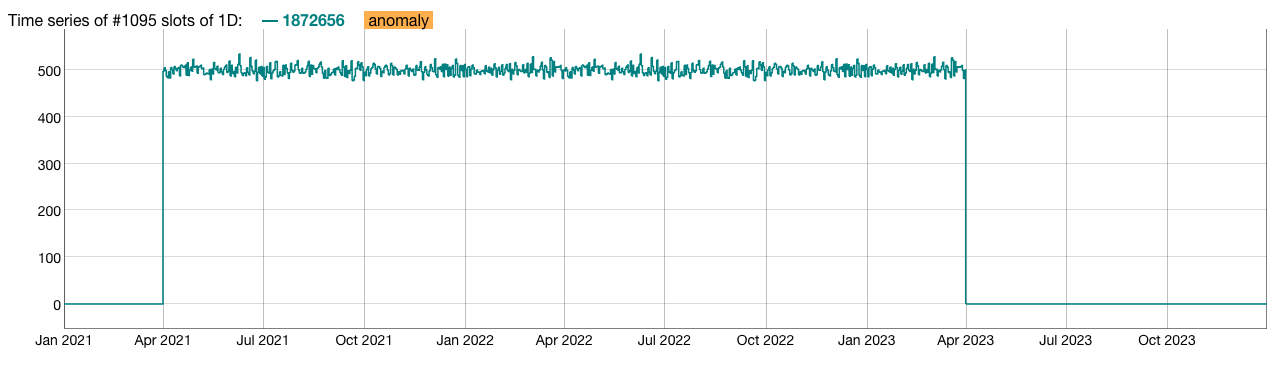

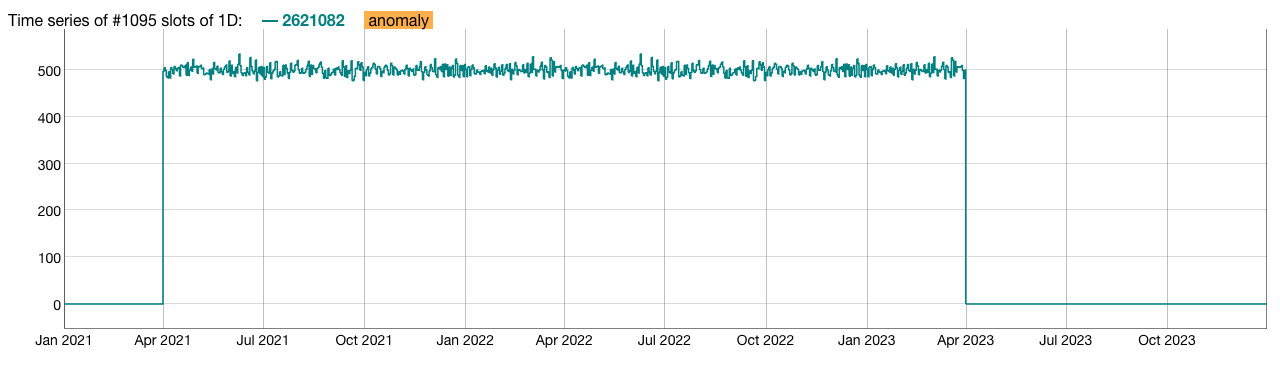

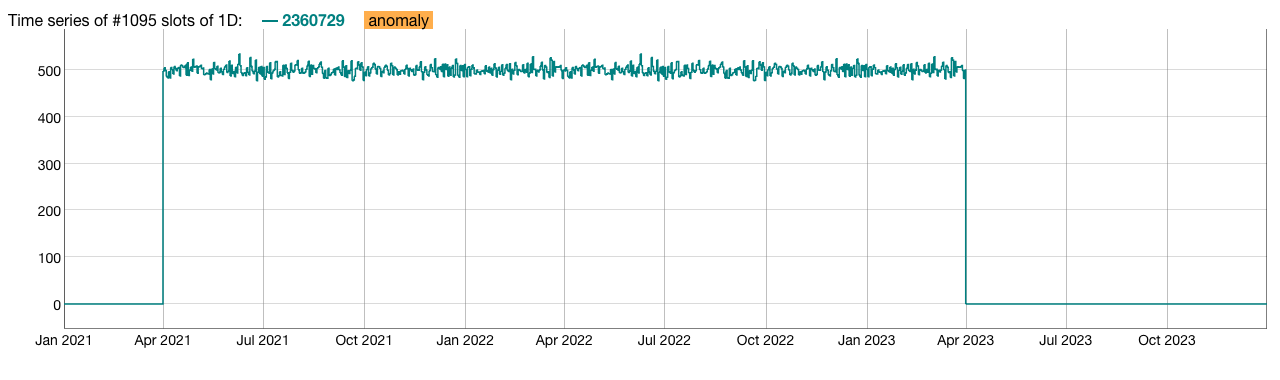

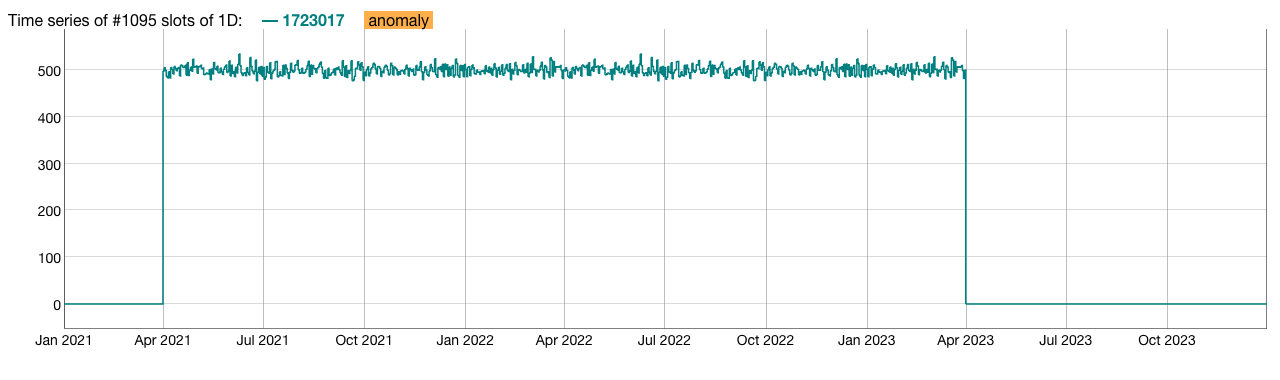

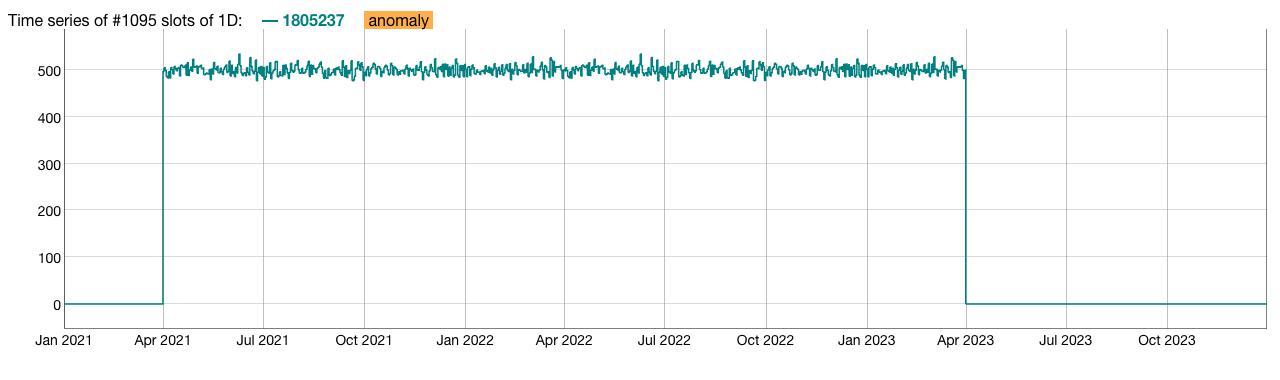

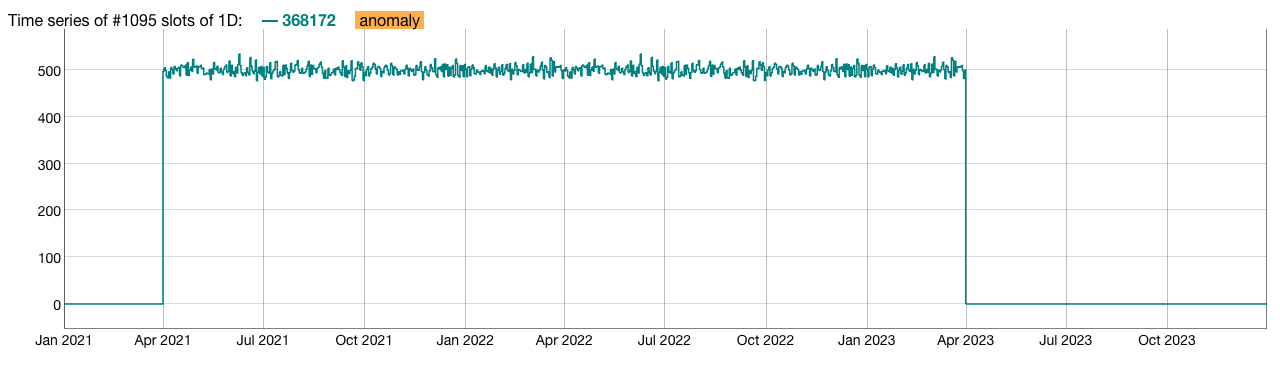

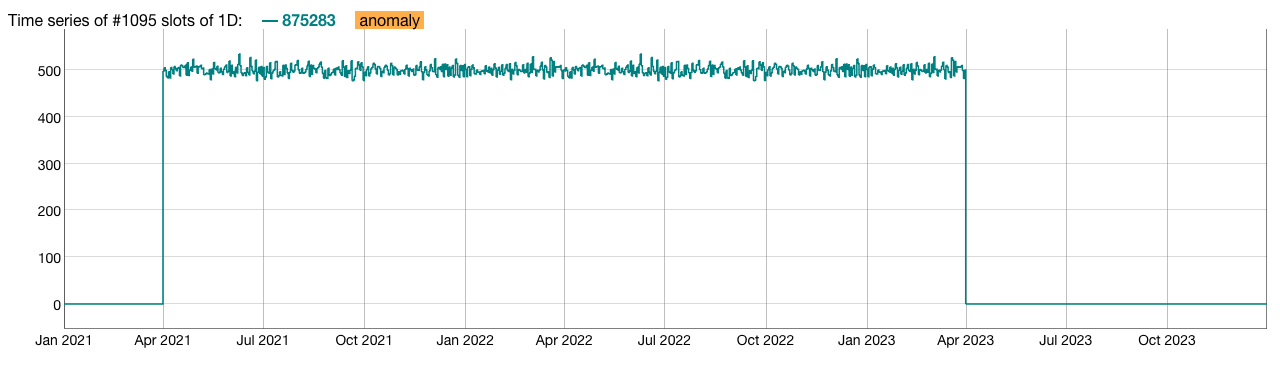

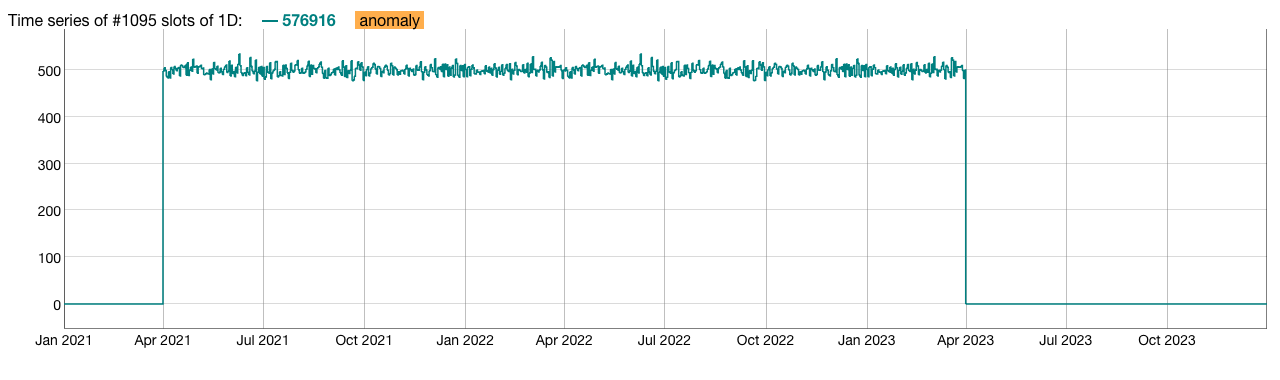

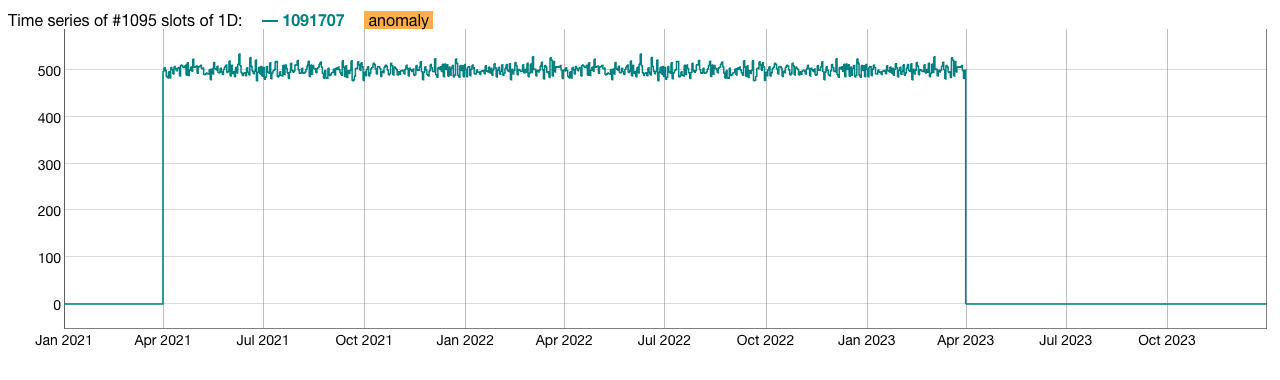

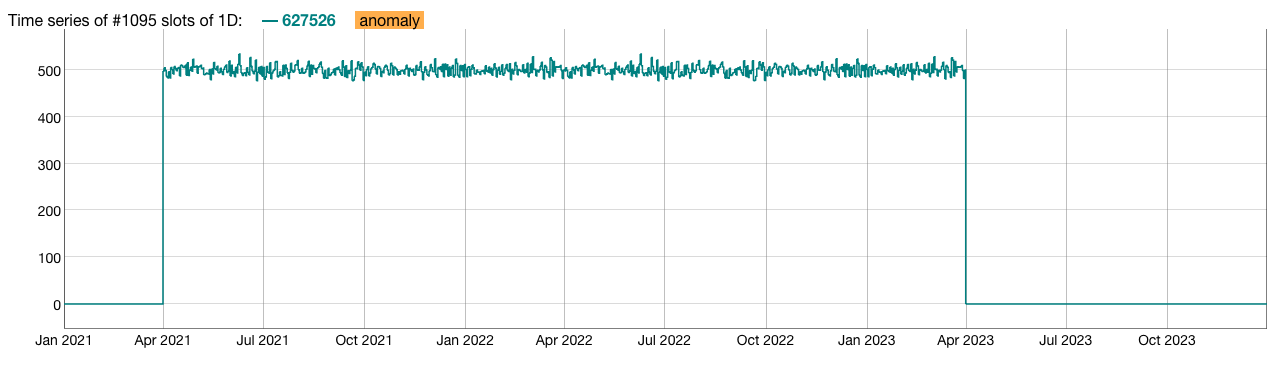

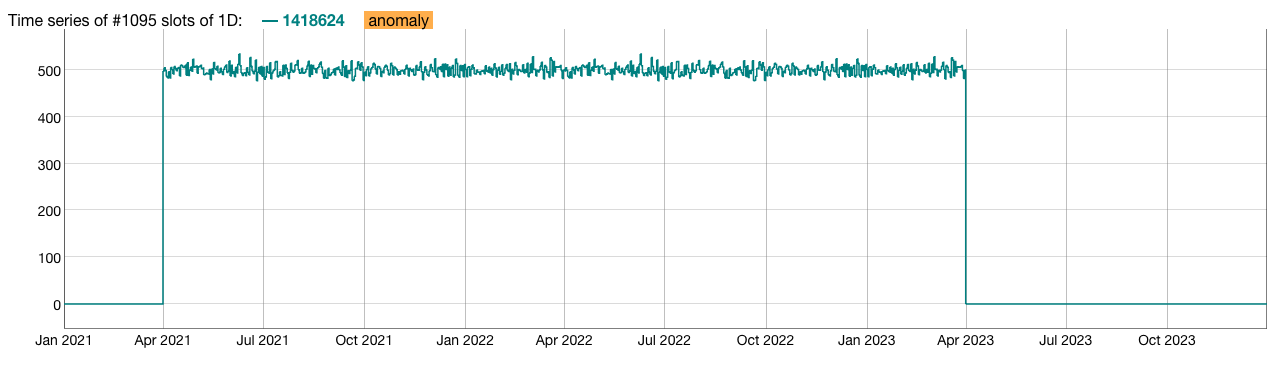

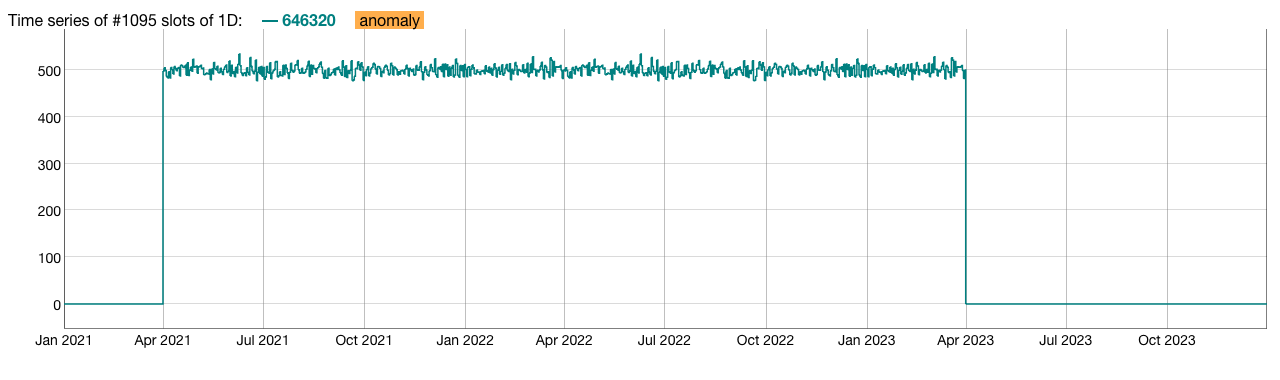

In [9]:
from IPython.display import display
from ats.utils import plot_timeseries_df

for results_timeseries_df in results_list_of_timeseries_df:
    id = results_timeseries_df.columns.to_list()[0]
    anomalous = results_timeseries_df['anomaly'][0]
    #print(f'id: {id}, anomalous: {anomalous}')
    display(plot_timeseries_df(results_timeseries_df, image=True))

# Also Inspect the anomaly detector w.r.t these results

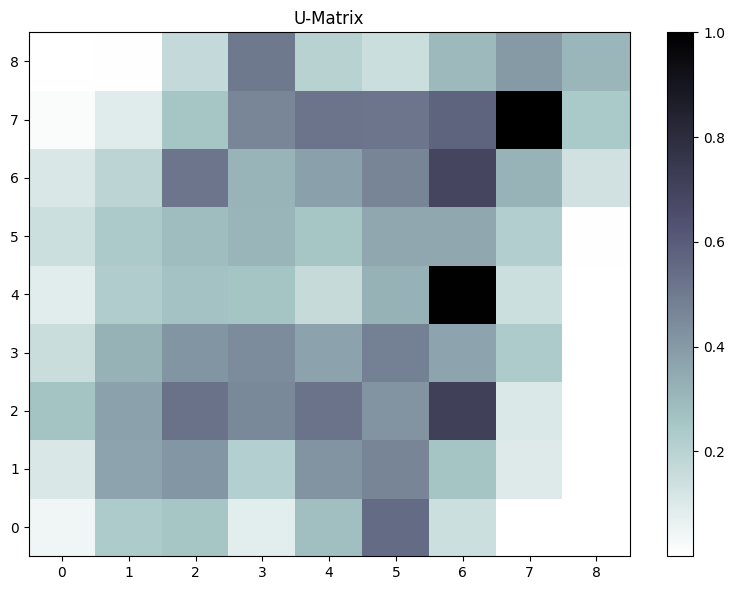

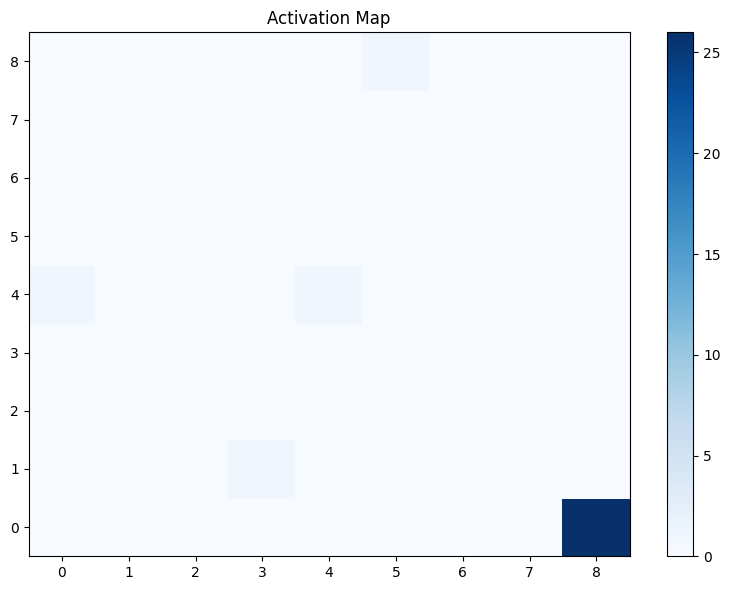

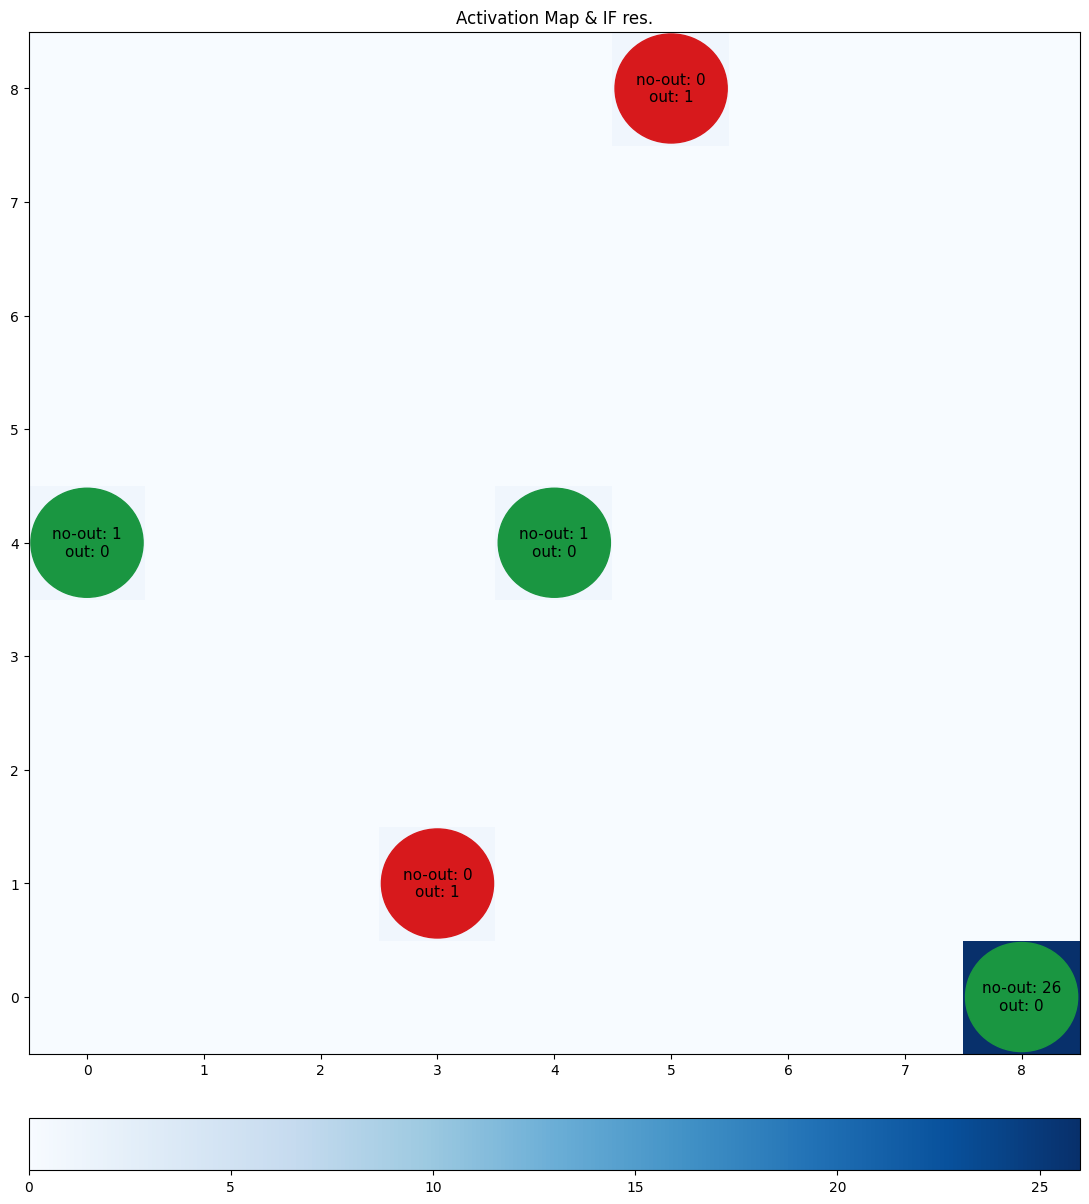

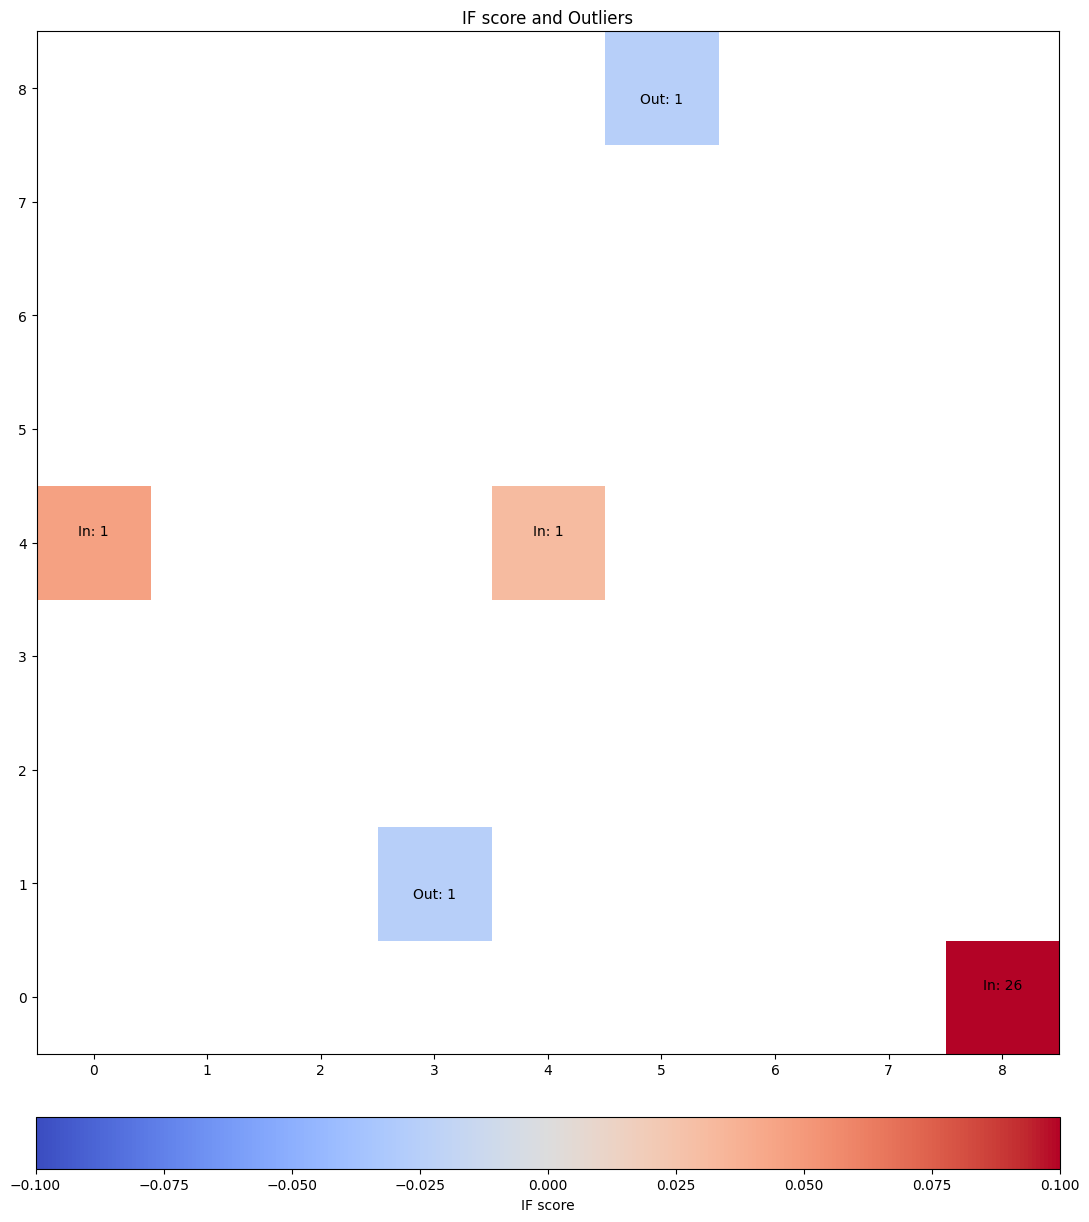

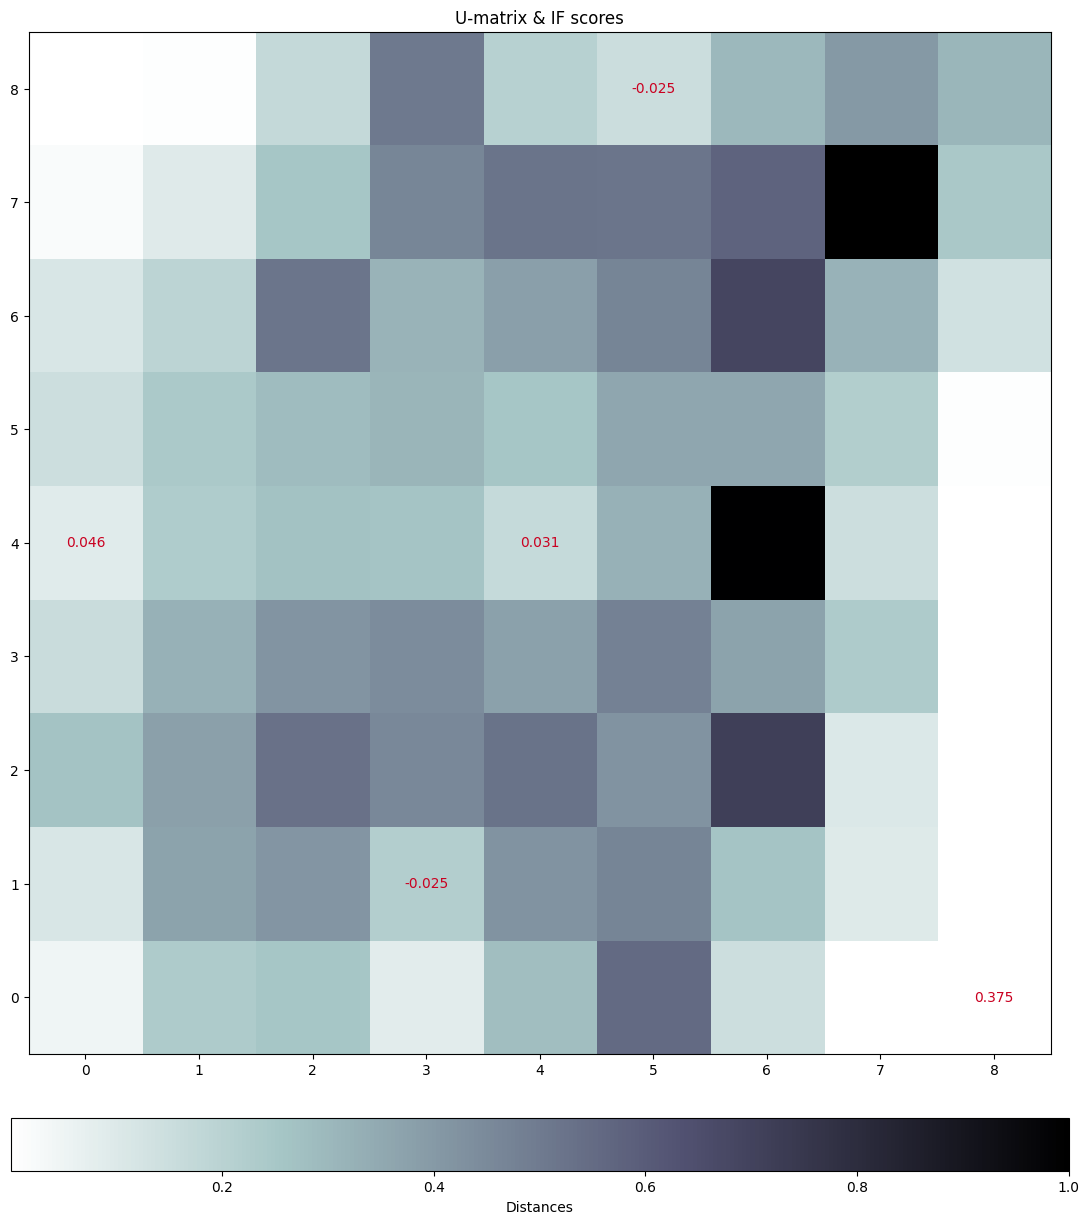

In [10]:
anomaly_detector.inspect()